# **Задание 1**

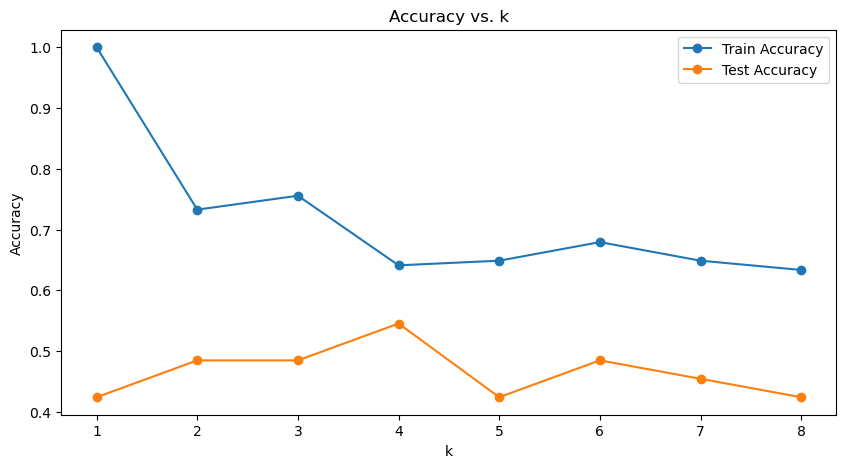

Dataset 1:
Precision: 0.38
Recall: 0.40
F1-score: 0.39
Confusion Matrix:
[[ 8 10]
 [ 9  6]]



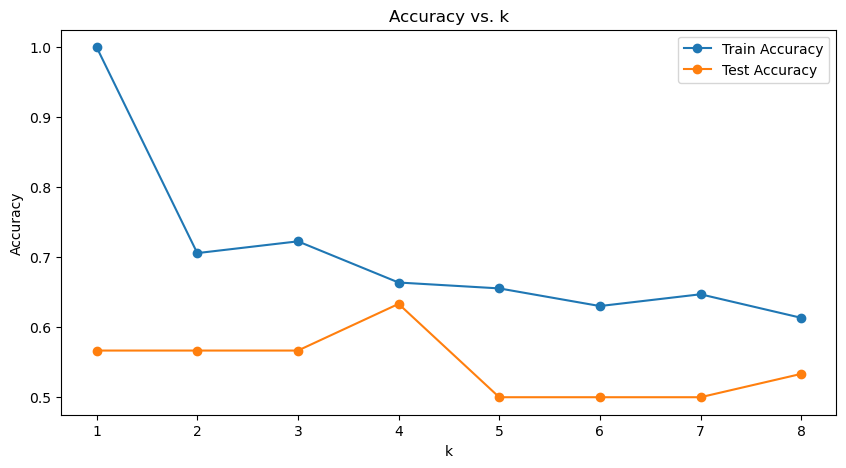

Dataset 2:
Precision: 0.42
Recall: 0.67
F1-score: 0.52
Confusion Matrix:
[[ 7 11]
 [ 4  8]]



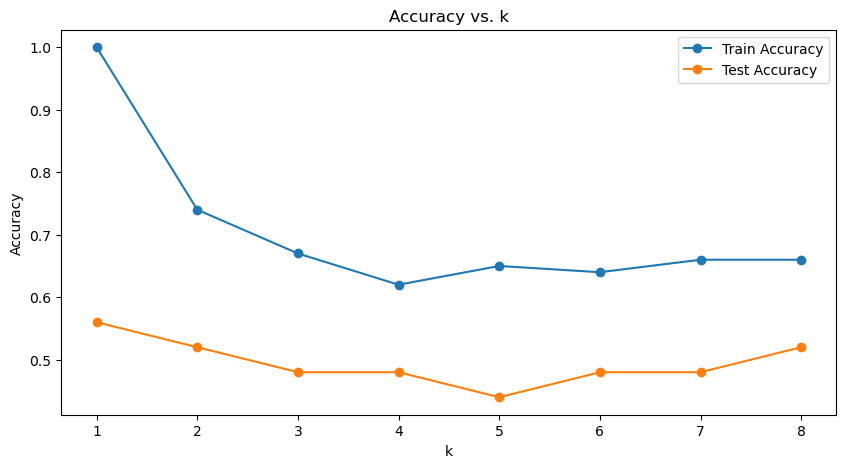

Dataset 3:
Precision: 0.33
Recall: 0.08
F1-score: 0.12
Confusion Matrix:
[[10  2]
 [12  1]]



In [50]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt

def generate_random_dataset():

    num_points = np.random.randint(100, 201)

    X = np.random.rand(num_points, 2)
    y = np.random.randint(0, 2, num_points)

    return X, y


for i in range(3):
    X, y = generate_random_dataset()

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    knn = KNeighborsClassifier()
    knn.fit(X_train, y_train)

    y_train_pred = knn.predict(X_train)
    y_test_pred = knn.predict(X_test)

    k_values = range(1, 9)
    train_accuracies = []
    test_accuracies = []
    for k in k_values:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        train_accuracy = accuracy_score(y_train, knn.predict(X_train))
        test_accuracy = accuracy_score(y_test, knn.predict(X_test))
        train_accuracies.append(train_accuracy)
        test_accuracies.append(test_accuracy)

    plt.figure(figsize=(10, 5))
    plt.plot(k_values, train_accuracies, 'o-', label='Train Accuracy')
    plt.plot(k_values, test_accuracies, 'o-', label='Test Accuracy')

    plt.xlabel('k')
    plt.ylabel('Accuracy')
    plt.title('Accuracy vs. k')
    plt.legend()
    plt.show()

    precision = precision_score(y_test, y_test_pred)
    recall = recall_score(y_test, y_test_pred)
    f1 = f1_score(y_test, y_test_pred)
    confusion = confusion_matrix(y_test, y_test_pred)

    print(f"Dataset {i + 1}:")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1-score: {f1:.2f}")
    print("Confusion Matrix:")
    print(confusion)
    print()

# Задание 2

In [51]:
import numpy as np

C = "Cat"
F = "Fish"
H = "Hen"

y_true = [C,C,C,C,C,C, F,F,F,F,F,F,F,F,F,F, H,H,H,H,H,H,H,H,H]

y_pred = [C,C,C,C,H,F, C,C,C,C,C,C,H,H,F,F, C,C,C,H,H,H,H,H,H]

def classify_objects(y_true, y_pred):

    class_dict = {C: 0, F: 1, H: 2}
    y_true_labels = [class_dict[label] for label in y_true]
    y_pred_labels = [class_dict[label] for label in y_pred]

    confusion_matrix = np.zeros((3, 3), dtype=int)
    for true_label, pred_label in zip(y_true_labels, y_pred_labels):
        confusion_matrix[true_label][pred_label] += 1

    tp = np.diag(confusion_matrix)
    fp = np.sum(confusion_matrix, axis=0) - tp
    fn = np.sum(confusion_matrix, axis=1) - tp

    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    f1_score = 2 * (precision * recall) / (precision + recall)
    support = np.sum(confusion_matrix, axis=1)

    accuracy = np.sum(tp) / np.sum(confusion_matrix)
    accuracy_support = np.sum(support)

    macro_avg_precision = np.mean(precision)
    macro_avg_recall = np.mean(recall)
    macro_avg_f1_score = np.mean(f1_score)
    macro_avg_support = np.sum(support)

    weighted_avg_precision = np.average(precision, weights=support)
    weighted_avg_recall = np.average(recall, weights=support)
    weighted_avg_f1_score = np.average(f1_score, weights=support)
    weighted_avg_support = np.sum(support)

    print("Confusion matrix:")
    print(confusion_matrix)
    print("")

    print("               precision  recall  f1-score  support")
    for label, p, r, f, s in zip([C, F, H], precision, recall, f1_score, support):
        print(f"         {label:4}    {p:.3f}    {r:.3f}    {f:.3f}      {s}")

    print("")
    print(f"    accuracy                       {accuracy:.3f}      {accuracy_support}")
    print(
        f"   macro avg     {macro_avg_precision:.3f}    {macro_avg_recall:.3f}    {macro_avg_f1_score:.3f}      {macro_avg_support}")
    print(
        f"weighted avg     {weighted_avg_precision:.3f}    {weighted_avg_recall:.3f}    {weighted_avg_f1_score:.3f}      {weighted_avg_support}")


classify_objects(y_true, y_pred)


Confusion matrix:
[[4 1 1]
 [6 2 2]
 [3 0 6]]

               precision  recall  f1-score  support
         Cat     0.308    0.667    0.421      6
         Fish    0.667    0.200    0.308      10
         Hen     0.667    0.667    0.667      9

    accuracy                       0.480      25
   macro avg     0.547    0.511    0.465      25
weighted avg     0.581    0.480    0.464      25


# Задание 3

In [81]:
import pandas as pd
from sklearn. model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
boston_data = pd.read_csv('Desktop/housing.csv')

X_train, X_test = train_test_split(data_frame, test_size=0.2, random_state=42)

X = boston_data[['RM', 'LSTAT', 'PTRATIO']]
y = boston_data['MEDV']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

best_r2 = -1
best_feature = ""

for feature in X.columns:
    model = LinearRegression()
    model.fit(X_train[[feature]], y_train)

    y_train_pred = model.predict(X_train[[feature]])
    y_test_pred = model.predict(X_test[[feature]])

    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)

    print(f"For feature {feature}:")
    print("Train R-squared:", r2_train)
    print("Test R-squared:", r2_test)
    print()

    if r2_test > best_r2:
        best_r2 = r2_test
        best_feature = feature

print("Best feature:", best_feature)
print("Best R-squared:", best_r2)

For feature RM:
Train R-squared: 0.49846279830145024
Test R-squared: 0.3919980373501618

For feature LSTAT:
Train R-squared: 0.5750937597560387
Test R-squared: 0.568383244702509

For feature PTRATIO:
Train R-squared: 0.27960407247293373
Test R-squared: 0.17616149786779767

Best feature: LSTAT
Best R-squared: 0.568383244702509
